# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [14]:
# Standard imports of the libraries we have been using in class:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The following was done after running the first .head(), which did not show all columns initially:

pd.set_option('display.max_columns', None)

In [15]:
# csv can be found here: https://www.kaggle.com/datasets/maximebonnin/dnd-characters-test

# Initial import of full .csv that will be chopped down:
fullSheet = pd.read_csv("over_one_mil_chars.csv")

In [16]:
# Running .head just to get a feel for the structure

fullSheet.head(15)

# Immediately, biggest things noted are: 
# There is a duplicate index column that does not need to exist
# The stat columns are labeled on kaggle as subscript, but are not labeled here, so they need to be renamed
# The classes, feats, and inventories are separated by slashes, which will make them easy to separate later
# I do not see all columns in just this .head so will need to fix that -- IT IS AT THIS MOMENT IN TIME THAT MAX_COLUMNS OPTION WAS CHANGED
# The main columns/series that were hidden on my display (which will vary based on screen resolution) were background, race, and class_starting -- those are all highly relevant to what I want to see so it is imperative that they're visible
# For the purposes of what I am going to be using this data for, Unnamed: 0, date_modified, and notes_len are all irrelevant and can be dropped
# However, given that this exercise is strictly just EDA, that can wait until checkpoint 3, where this dataframe will be transformed considerably, both in terms of renaming series and dropping columns

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,background,race,class_starting,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,0,1,Molster,8,11,22,11,17,20,12,Urban Bounty Hunter,Aarakocra,Artificer,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,1,3,Prailak,103,12,17,18,14,16,16,Charlatan,Tiefling,Warlock,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,2,8,Aurilanax,76,18,10,16,13,13,16,City Watch / Investigator,Bugbear,Paladin,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,3,10,Gamndell Banglebon,127,10,14,16,16,15,18,Clan Crafter,Gnome,Warlock,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,4,19,Bellek Bouncer,52,10,10,15,12,14,10,Sailor,Half-Orc,Cleric,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00
5,5,44,Yehudi,41,15,8,14,16,13,16,Far Traveler,Firbolg,Monk,5,Way of the Long Death,NaN,NaN,5,NaN,Shield,2022-11-08T02:58:57.507Z,157,5.00
6,6,45,Rockhand,82,18,14,17,7,8,13,Outlander,Goliath,Barbarian,11,Path of the Wild Soul (archived),NaN,NaN,11,Dual Wielder,Amulet of Proof against Detection and Location...,2020-12-03T21:38:23.06Z,354,10305.75
7,7,48,Atherinnyia 'Rinn' Teshurr,62,8,14,13,17,12,15,Noble,Elf,Wizard,13,School of Evocation,Sorcerer,Draconic Bloodline,15,Resilient (Constitution),Circlet of Blasting/Robe of Stars/Potion of He...,2022-10-31T07:40:18.41Z,2765,73.42
8,8,54,Althovion,58,12,15,15,13,15,16,Charlatan,Human,Sorcerer,14,Shadow Magic,NaN,NaN,14,Resilient (Dexterity)/Ritual Caster (Wizard),Bag of Holding/Circlet of Blasting/Cloak of th...,2021-09-21T06:33:28Z,3336,522.84
9,9,59,Veelan Pheer'ii,12,10,14,14,10,12,13,Far Traveler,Genasi,Fighter,5,Champion,Rogue,Thief,8,NaN,"Censer of Controlling Air Elementals/Shield, +...",2018-06-29T15:37:47Z,13,10.00


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [17]:
# Running .info to get a feel of the info:

fullSheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204252 entries, 0 to 1204251
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1204252 non-null  int64  
 1   char_id               1204252 non-null  int64  
 2   name                  1199602 non-null  object 
 3   base_hp               1204252 non-null  int64  
 4   stats_1               1204252 non-null  int64  
 5   stats_2               1204252 non-null  int64  
 6   stats_3               1204252 non-null  int64  
 7   stats_4               1204252 non-null  int64  
 8   stats_5               1204252 non-null  int64  
 9   stats_6               1204252 non-null  int64  
 10  background            898870 non-null   object 
 11  race                  1204252 non-null  object 
 12  class_starting        1204252 non-null  object 
 13  class_starting_level  1204252 non-null  int64  
 14  subclass_starting     607804 non-n

In [ ]:
# Running .head just to get a feel for the structure

fullSheet.head(15)

# Immediately, biggest things noted are: 
# There is a duplicate index column that does not need to exist
# The stat columns are labeled on kaggle as subscript, but are not labeled here, so they need to be renamed
# The classes, feats, and inventories are separated by slashes, which will make them easy to separate later
# I do not see all columns in just this .head so will need to fix that -- IT IS AT THIS MOMENT IN TIME THAT MAX_COLUMNS OPTION WAS CHANGED
# The main columns/series that were hidden on my display (which will vary based on screen resolution) were background, race, and class_starting -- those are all highly relevant to what I want to see so it is imperative that they're visible
# For the purposes of what I am going to be using this data for, Unnamed: 0, date_modified, and notes_len are all irrelevant and can be dropped. Inventory is a cool piece of data to have, but also not super necessary for the scope of this, either. Char_id also
    # probably can go, although it will be useful for checking if any duplicate rows exist before dropping it.
# However, given that this exercise is strictly just EDA, that can wait until checkpoint 3, where this dataframe will be transformed considerably, both in terms of renaming series and dropping columns
# As a small final note, there are a small number of characters that have a nickname, denoted in quotes. That will be fun to track and also maybe something that has to be noted in case the quotes break string formatting

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,background,race,class_starting,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,0,1,Molster,8,11,22,11,17,20,12,Urban Bounty Hunter,Aarakocra,Artificer,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,1,3,Prailak,103,12,17,18,14,16,16,Charlatan,Tiefling,Warlock,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,2,8,Aurilanax,76,18,10,16,13,13,16,City Watch / Investigator,Bugbear,Paladin,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,3,10,Gamndell Banglebon,127,10,14,16,16,15,18,Clan Crafter,Gnome,Warlock,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,4,19,Bellek Bouncer,52,10,10,15,12,14,10,Sailor,Half-Orc,Cleric,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00
5,5,44,Yehudi,41,15,8,14,16,13,16,Far Traveler,Firbolg,Monk,5,Way of the Long Death,NaN,NaN,5,NaN,Shield,2022-11-08T02:58:57.507Z,157,5.00
6,6,45,Rockhand,82,18,14,17,7,8,13,Outlander,Goliath,Barbarian,11,Path of the Wild Soul (archived),NaN,NaN,11,Dual Wielder,Amulet of Proof against Detection and Location...,2020-12-03T21:38:23.06Z,354,10305.75
7,7,48,Atherinnyia 'Rinn' Teshurr,62,8,14,13,17,12,15,Noble,Elf,Wizard,13,School of Evocation,Sorcerer,Draconic Bloodline,15,Resilient (Constitution),Circlet of Blasting/Robe of Stars/Potion of He...,2022-10-31T07:40:18.41Z,2765,73.42
8,8,54,Althovion,58,12,15,15,13,15,16,Charlatan,Human,Sorcerer,14,Shadow Magic,NaN,NaN,14,Resilient (Dexterity)/Ritual Caster (Wizard),Bag of Holding/Circlet of Blasting/Cloak of th...,2021-09-21T06:33:28Z,3336,522.84
9,9,59,Veelan Pheer'ii,12,10,14,14,10,12,13,Far Traveler,Genasi,Fighter,5,Champion,Rogue,Thief,8,NaN,"Censer of Controlling Air Elementals/Shield, +...",2018-06-29T15:37:47Z,13,10.00


In [19]:
# Initializing a dictionary to hold the values of stats, and while it will be used to rename column headers in the future, for right now it is just for me to print out as a refresher, ha

statNames = {'stats_1': 'Strength',
    'stats_2': 'Dexterity',
    'stats_3': 'Constitution',
    'stats_4': 'Intelligence',
    'stats_5': 'Wisdom',
    'stats_6': 'Charisma'
}

In [ ]:
# Once again copying the code from data manip studio to see what the percentages of null values per column are

for col in fullSheet.columns:
    pct_missing = np.mean(fullSheet[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Every single character has a name, HP, all six stats, race, starting class/level, total level, and gold count. That's an awful lot to work with. Plus other criteria (like subclasses or other classes), it is natural for those to not exist on every line
    # so for the most part the data itself looks very good and able to be worked with for the purposes of my questions. 

Unnamed: 0 - 0%
char_id - 0%
name - 0%
base_hp - 0%
stats_1 - 0%
stats_2 - 0%
stats_3 - 0%
stats_4 - 0%
stats_5 - 0%
stats_6 - 0%
background - 25%
race - 0%
class_starting - 0%
class_starting_level - 0%
subclass_starting - 50%
class_other - 93%
subclass_other - 96%
total_level - 0%
feats - 82%
inventory - 31%
date_modified - 0%
notes_len - 0%
gold - 0%


In [22]:
# Running unique to see the all the different starting classes used
fullSheet['class_starting'].unique()

array(['Artificer', 'Warlock', 'Paladin', 'Cleric', 'Monk', 'Barbarian',
       'Wizard', 'Sorcerer', 'Fighter', 'Rogue', 'Bard', 'Ranger',
       'Druid', 'Blood Hunter (archived)', 'Artificer (UA)',
       'Blood Hunter'], dtype=object)

In [ ]:
# Running value counts of the class starting to see what most people start with 
fullSheet['class_starting'].value_counts()

class_starting
Fighter                    141664
Rogue                      137773
Ranger                     108182
Paladin                     99910
Wizard                      98154
Cleric                      97858
Barbarian                   95489
Bard                        86859
Warlock                     86515
Sorcerer                    81233
Monk                        79001
Druid                       76494
Blood Hunter (archived)     14179
Artificer                     435
Blood Hunter                  403
Artificer (UA)                103
Name: count, dtype: int64

In [ ]:
# Running value counts of starting level to see what most common starting level is. Expectation is that level 1 is the most popular starting level, by far
fullSheet['class_starting_level'].value_counts()

# Level 1 is the most popular by far, interesting that 3 and 5 are more popular than level 2 and 5, but that makes sense, as in DnD characters gain a lot of additional power every other level up, so starting at those levels for a small power spike makes sense.

class_starting_level
1     548609
3     137330
5      98015
2      77197
4      73710
6      50187
10     33782
7      33601
8      32628
20     29905
9      20938
11     14125
12     13233
15     10360
13      7885
14      7699
16      4916
17      4604
18      3623
19      1905
Name: count, dtype: int64

In [ ]:
# Running unique on the race column to see what all there is, also running it with strip and title to eliminate 
fullSheet['race'].unique()

# ....1189 different races, damn

array(['Aarakocra', 'Tiefling', 'Bugbear', ..., 'Nosferatu', 'Gobs',
       'She-wolf'], shape=(1189,), dtype=object)

In [ ]:
# Running value counts of all races to see what's most popular
fullSheet['race'].value_counts()

# Would like to see list of all races where at least 10 characters are that race

race
Human               260467
Elf                 194312
Half-Elf            115163
Dwarf                89961
Tiefling             89939
                     ...  
Half Banshee             1
Vali                     1
An'Ku                    1
Arcosians                1
COPY_OF_Half-Elf         1
Name: count, Length: 1189, dtype: int64

In [ ]:
# Initializing a new variable of a dataframe to get value counts over 10, first step is making a variable that is a dataframe of just the raw counts

racesCount = fullSheet['race'].value_counts()
racesCount

race
Human               260467
Elf                 194312
Half-Elf            115163
Dwarf                89961
Tiefling             89939
                     ...  
Half Banshee             1
Vali                     1
An'Ku                    1
Arcosians                1
COPY_OF_Half-Elf         1
Name: count, Length: 1189, dtype: int64

In [ ]:
# Now trimming the value counts to 10 or more
racesCountOverTen = racesCount.loc[racesCount > 10]
racesCountOverTen

# Interesting there's still 120 over ten. Makes sense with 1.2 million lines though. 

race
Human           260467
Elf             194312
Half-Elf        115163
Dwarf            89961
Tiefling         89939
                 ...  
Half-Goliath        11
Amazon              11
Skeleton            11
Beevallan           11
Cat Folk            11
Name: count, Length: 120, dtype: int64

In [ ]:
# Getting a count of actual character level, not starting level:

fullSheet['total_level'].value_counts()

# Seeing characters outside of the normal 1-20 levelling curve is interesting, but the distribuition makes sense -- in general it's close to numerical order, but with higher amounts at certain power breakpoints or the level cap of 20

total_level
1     534837
3     132472
5      96041
2      75333
4      71576
6      50571
20     40023
10     37053
7      34953
8      33525
9      22847
11     15351
12     14478
15     11731
13      8978
14      8685
16      5716
17      4402
18      3745
19      1923
30         4
22         4
34         3
21         1
Name: count, dtype: int64

In [ ]:
# Checking the mean/median/max gold counts

meanGold = fullSheet['gold'].mean()
medianGold = fullSheet['gold'].median()
maxGold = fullSheet['gold'].max()

print(meanGold, medianGold, maxGold)

# The mean being 1.3 mil is crazy
# Median of 0.0 is kind of insane at first glance, but makes sense with how destitute low-level players and how one-shot campaigns probably don't worry about player gold
# TWO BILLION?????????????????????????????????????

1336150.9002775 0.0 20520990000.0


In [ ]:
# Checking gold counts where the 1st and 99th qunatiles are chopped off
gold01Quantile = fullSheet['gold'].quantile(.01)
gold99Quantile = fullSheet['gold'].quantile(.99)
meanGoldWithoutExtremes = fullSheet['gold'][((fullSheet['gold'] > fullSheet['gold'].quantile(.01)) & (fullSheet['gold'] < fullSheet['gold'].quantile(.99)))].mean()
print(gold01Quantile, gold99Quantile, meanGoldWithoutExtremes)

# These numbers make a lot more sense. However, while playing around with different quantiles, a shocking number of them had 0.0, so going to run a quick count to see how many characters have 0.0 gold. 

0.0 14577.0 426.1330572243735


In [ ]:
# Now counting number of rows where gold is 0.00
fullSheet[fullSheet['gold'] == 0.00].shape

# 615,284. So only very slightly above half of all players, but still kinda crazy

(615284, 23)

In [ ]:
# Finishing off gold with .describe(). While that could have been used for the above, I do enjoy working through things piece by piece, and also it's a more thorough walkthrough of the thought process

fullSheet['gold'].describe().apply(lambda x: format(x, 'f')) # <---- this on the end was after a googling of "how to make .describe not show scientific notation"

# While this is certainly all of the stats in one place, I do not like the formatting of it particularly well

count        1204252.000000
mean         1336150.900278
std        113145544.555715
min                0.000000
25%                0.000000
50%                0.000000
75%               25.000000
max      20520990000.000000
Name: gold, dtype: object

In [ ]:
# What about the number of levels each character gains? Easiest way to do that is to initialize a new dataframe that is total levels minus starting level, then running value_counts

levelsGained = fullSheet['total_level'] - fullSheet['class_starting_level']
levelsGained.value_counts()

# Given the propensity of DnD campaigns to be one-offs (singular play sessions that do not have characters level) or to fizzle early because getting 4+ working adults together regularly is borderline impossible, these values make complete sense

0     1125438
1       21863
2       13452
3       13014
4        7497
5        6264
6        3876
8        2218
7        2187
10       1743
9        1508
11        879
12        868
14        764
15        630
13        527
17        488
16        405
18        322
19        308
20          1
Name: count, dtype: int64

In [ ]:
# Wonder if any names are duplicated, and if so, what are the most popular names?

fullSheet['name'].value_counts()

# ....

name
Test                    1206
Bob                     1003
test                     505
Varis                    469
Rhogar                   461
                        ... 
Ronald McDrumph            1
Lyudmila                   1
Grimmz the Dead King       1
Zielar Hellfist            1
Kieran Farowyn             1
Name: count, Length: 393262, dtype: int64

In [ ]:
# Going to run this with .title just to make sure everything is the same case, as prior line showed that not all cases are the same

fullSheet['name'].str.title().value_counts()

# Shows the value of making everything same case when doing proper data manip in next step. Not shocking at all that Steve exists on this list too

name
Test                          1792
Bob                           1262
Varis                          487
Rhogar                         465
Steve                          361
                              ... 
Alexander Stonecutter            1
Griv Ungart                      1
Veelan Pheer'Ii                  1
Atherinnyia 'Rinn' Teshurr       1
Rockhand                         1
Name: count, Length: 388581, dtype: int64

In [106]:
# Now to find the averages of the stats. While in time we will want to rename the stat columns, for right now the fact that they are named stats_1 through stats_6 makes it easy to code by using a for loop and f formatting

# Initialze list based on stat names

statNamesValuesList = list(statNames.values())


# Initialize dictionary to hold stat average value
statAverages = {}
for i in range(len(statNamesValuesList)):

    # Create a variable to hold mean of stat column, i+1 necessary because 0 based indexing, but stats columns do not have stats_0
    average = fullSheet[f'stats_{i+1}'].mean().round(decimals=2)

    # Update average variable to statAverages dict
    statAverages.update({statNamesValuesList[i]: average})

# Print dict to see averages    
print(statAverages)

# Initialize dict as series to be better formatted
statAveragesSeries = pd.Series(statAverages)
statAveragesSeries

# Genuinely surprising that Con is second highest, almost equivalent with Dex. Makes sense though as all characters need Con to live, whereas the other stats could all be ignored or intentionally lowered by players min-maxing

{'Strength': np.float64(10.52), 'Dexterity': np.float64(11.54), 'Constitution': np.float64(11.47), 'Intelligence': np.float64(10.26), 'Wisdom': np.float64(10.91), 'Charisma': np.float64(10.67)}


Strength        10.52
Dexterity       11.54
Constitution    11.47
Intelligence    10.26
Wisdom          10.91
Charisma        10.67
dtype: float64

In [108]:
# Now doing the same but for mode of the stats

# Initialize dictionary to hold stat mode value
statMode = {}
for i in range(len(statNamesValuesList)):

    mode = fullSheet[f'stats_{i+1}'].mode()[0]

    # Update mode variable to statMode dict
    statMode.update({statNamesValuesList[i]: mode})

print(statMode)

statModeSeries = pd.Series(statMode)
statModeSeries

# This makes a lot of sense, as for players that aren't Strength builds, it is by far the least valueable stat

{'Strength': np.int64(8), 'Dexterity': np.int64(15), 'Constitution': np.int64(14), 'Intelligence': np.int64(10), 'Wisdom': np.int64(12), 'Charisma': np.int64(15)}


Strength         8
Dexterity       15
Constitution    14
Intelligence    10
Wisdom          12
Charisma        15
dtype: int64

In [104]:
# Now, Max values

# Initialize dictionary to hold stat max value
statMax = {}
for i in range(len(statNamesValuesList)):

    max = fullSheet[f'stats_{i+1}'].max()

    # Update max variable to statMax dict
    statMax.update({statNamesValuesList[i]: max})

print(statMax)

statMaxSeries = pd.Series(statMax)
statMaxSeries

# .... huh. Makes sense they max at 30 but surprising to see them evenly 

{'Strength': np.int64(30), 'Dexterity': np.int64(30), 'Constitution': np.int64(30), 'Intelligence': np.int64(30), 'Wisdom': np.int64(30), 'Charisma': np.int64(30)}


Strength        30
Dexterity       30
Constitution    30
Intelligence    30
Wisdom          30
Charisma        30
dtype: int64

In [ ]:
# Min Values

statMin = {}
for i in range(len(statNamesValuesList)):

    min = fullSheet[f'stats_{i+1}'].min()

    # Update max variable to statMax dict
    statMin.update({statNamesValuesList[i]: min})

print(statMin)

statMinSeries = pd.Series(statMin)
statMinSeries

# .... I did not expect to see actual zeroes in here. Per my understanding of DnD rules, if a stat is zero your character dies. 
# Upon further investigation, the following was found: 

#        Strength 0 means that the character cannot move at all. He lies helpless on the ground.

#        Dexterity 0 means that the character cannot move at all. He stands motionless, rigid, and helpless.

#        Constitution 0 means that the character is dead.

#        Intelligence 0 means that the character cannot think and is unconscious in a coma-like stupor, helpless.

#        Wisdom 0 means that the character is withdrawn into a deep sleep filled with nightmares, helpless.

#        Charisma 0 means that the character is withdrawn into a catatonic, coma-like stupor, helpless.

# So the characters with Con 0 are in fact dead. I do wish we were given stats on character creation and stats on final version of character, as it's possible that some of these characters lost stat points to poisons, spells, or other ability damage. 
    # But this is all we have so it must do. 



{'Strength': np.int64(0), 'Dexterity': np.int64(0), 'Constitution': np.int64(0), 'Intelligence': np.int64(0), 'Wisdom': np.int64(0), 'Charisma': np.int64(0)}


Strength        0
Dexterity       0
Constitution    0
Intelligence    0
Wisdom          0
Charisma        0
dtype: int64

In [ ]:
# Welp, might as well see how many dead characters there are 

# ....which one was Con again?
statNamesSeries = pd.Series(statNames)
statNamesSeries

# Right, stats_3

stats_1        Strength
stats_2       Dexterity
stats_3    Constitution
stats_4    Intelligence
stats_5          Wisdom
stats_6        Charisma
dtype: object

In [ ]:
deadCharacters = fullSheet[(fullSheet['stats_3'] == 0)]
deadCharacters.shape

# There's no way there's 147 thousand characters with a Con of 0, correct?

(147461, 23)

In [ ]:
# Checking it via value_counts()

fullSheet['stats_3'].value_counts()

# This must be a catch-all for characters that had a non-recorded value, it's hard to believe that over 10% of all characters have 0 value, especially given that there's so few values of 2 and 1. 
    # Will need to probably turn them in to NaN when cleaning data. Good to know. 

stats_3
14    264529
13    216545
12    158719
0     147461
15    128172
10     86742
16     51452
11     43914
8      38477
18     23806
17     23018
9      12791
7       2900
6       1647
3       1613
5       1279
4       1044
20        77
19        31
30         9
2          6
22         5
1          4
25         4
24         2
21         2
26         1
29         1
28         1
Name: count, dtype: int64

In [ ]:
# Quickly running these for the other stats. Strength: 

fullSheet['stats_1'].value_counts()

stats_1
8     200679
15    177714
10    149672
0     145239
12    120819
14    105169
13     93383
11     48666
16     39418
9      38224
18     38151
17     25821
7       9059
6       5565
5       2709
3       2073
4       1696
20       102
19        44
30        11
2          6
22         6
1          5
21         4
25         4
23         4
26         4
28         3
27         1
24         1
Name: count, dtype: int64

In [ ]:
# Dexterity:

fullSheet['stats_2'].value_counts()

stats_2
15    212856
14    176525
13    169066
0     146583
12    122596
10    109042
8      63870
16     56506
18     45207
11     40362
17     34044
9      17221
7       3902
6       2128
3       1542
5       1495
4       1086
20       120
19        66
22         7
30         7
21         6
1          5
28         3
25         3
24         2
29         1
26         1
Name: count, dtype: int64

In [126]:
# Intelligence:
fullSheet['stats_4'].value_counts()

stats_4
10    222559
12    163158
0     147873
8     143028
13    126520
15    108686
14    103407
11     68663
9      37058
16     27052
18     22266
17     16382
7       7523
6       4192
5       2216
3       1941
4       1597
20        51
19        49
30         7
22         6
21         5
2          4
1          4
25         3
28         1
23         1
Name: count, dtype: int64

In [127]:
# Wisdon
fullSheet['stats_5'].value_counts()

stats_5
12    179694
10    167519
14    156389
15    148669
0     147875
13    132733
8      82708
11     56422
16     40841
18     28092
17     24888
9      24799
7       5128
6       2889
5       1965
3       1926
4       1562
20        83
19        46
30         7
25         4
1          4
22         2
28         2
21         2
27         1
23         1
2          1
Name: count, dtype: int64

In [ ]:
# Charisma
fullSheet['stats_6'].value_counts()

# Consistently ~147k characters with 0 value. Probably means I need to check them all to see if it's all stats those characters are missing. 

stats_6
15    163174
8     160502
10    148305
0     147813
12    138096
14    124483
13    107446
11     53740
16     42477
18     38337
9      33749
17     26763
7       7739
6       4762
5       2694
3       2179
4       1787
20       119
19        51
1          8
21         7
30         7
2          3
25         3
22         3
23         2
28         2
24         1
Name: count, dtype: int64

In [ ]:
zeroStatsCheck = fullSheet.loc[(fullSheet['stats_3'] == 0)]
zeroStatsCheck.head(20)

# Relieving. This means that it's likely (albeit not guaranteed) that if a character has a zero for one stat, it is likely a zero for all stats. Will make it considerably easier to filter and get accurate data later. 

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,background,race,class_starting,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
24,24,197,Reginald Hawke,12,0,0,0,0,0,0,NaN,Human,Fighter,7,NaN,NaN,NaN,7,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
25,25,206,Petie's Character,12,0,0,0,0,0,0,NaN,Genasi,Barbarian,1,NaN,NaN,NaN,1,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
32,32,262,Canis Treya,12,0,0,0,0,0,0,NaN,Human,Cleric,1,NaN,NaN,NaN,1,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
33,33,354,Noelani Marlowe,12,0,0,0,0,0,0,NaN,Genasi,Druid,3,Circle of the Land (Forest),NaN,NaN,3,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
39,39,2485,Lil_kamini's Character,12,0,0,0,0,0,0,Sage,Human,Sorcerer,1,NaN,NaN,NaN,1,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
41,41,2515,Sigurd,12,0,0,0,0,0,0,NaN,Human,Fighter,3,Champion,NaN,NaN,3,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
42,42,2555,CW3_Clare's Character,38,0,0,0,0,0,0,NaN,Human,Rogue,7,NaN,NaN,NaN,7,NaN,NaN,2019-02-23T18:21:15.487Z,0,0.0
44,44,2636,Saeranna Tallithe,12,0,0,0,0,0,0,NaN,Genasi,Ranger,9,Hunter,NaN,NaN,9,NaN,NaN,2022-03-11T20:31:01.713Z,0,0.0
48,48,2778,Dokut Eciam,12,0,0,0,0,0,0,NaN,Tiefling,Warlock,1,NaN,NaN,NaN,1,NaN,NaN,2018-06-29T15:37:47Z,0,0.0
49,49,2779,Olutar,12,0,0,0,0,0,0,NaN,Dwarf,Fighter,1,NaN,NaN,NaN,1,NaN,NaN,2018-06-29T15:37:47Z,0,0.0


In [ ]:
# Running value counts to see what these are

zeroStatsCheck['stats_1'].value_counts()

# 98% of characters with zero constitution have zero strength. So instead of just excluding these rolls I will just want to put a sanity check on it where the math searches for values of 1 or above. Or, more likely, turn the 0's into NaN via numpy. 
    # Upon further reflection, while it is true that the 0 values are technically possible in real-time, a character-sheet based snapshot would never have a 0. So we can rule those out as things to be filtered. This also calls into question the 0.0 gold values
    # as well, even if it is substantially more plausible for a character to have 0 gold than 0 of an attribute. 

stats_1
0     144787
15       557
18       420
8        392
10       272
12       247
14       186
13       175
16       135
17        84
9         59
3         53
11        42
7         18
6         14
4          9
5          8
21         1
30         1
20         1
Name: count, dtype: int64

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

<function matplotlib.pyplot.show(close=None, block=None)>

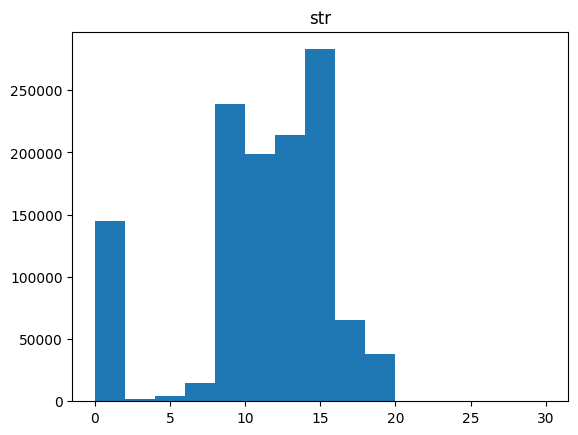

In [ ]:
# Because the other data isn't super clean and needs to be broken apart to be able to be sorted, just gonna run a quick histogram of all of the stats and leave the rest for later

plt.hist(fullSheet['stats_1'], bins=15)
plt.title('str')
plt.show

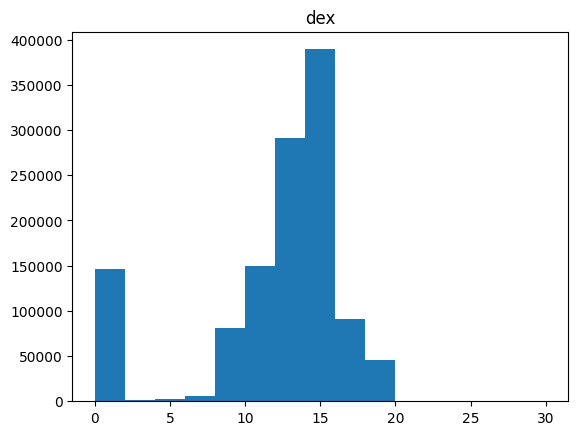

In [ ]:
# now dexterity

plt.hist(fullSheet['stats_2'], bins=15)
plt.title('dex')
plt.show()

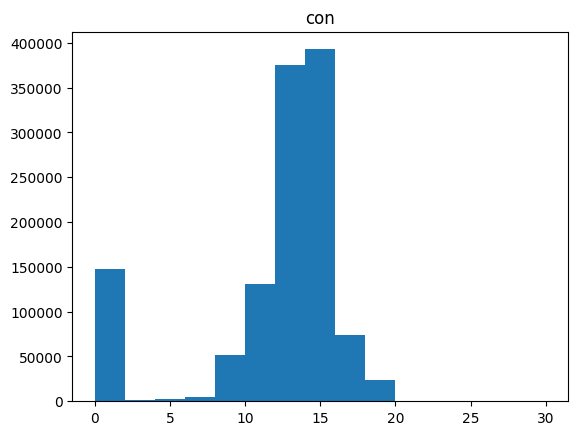

In [138]:
# now constitution

plt.hist(fullSheet['stats_3'], bins=15)
plt.title('con')
plt.show()

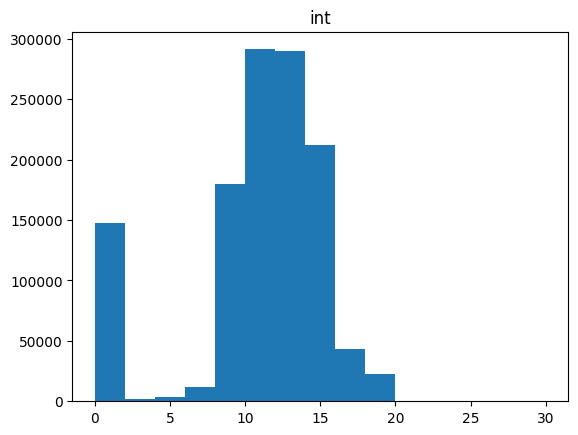

In [139]:
# intelligence

plt.hist(fullSheet['stats_4'], bins=15)
plt.title('int')
plt.show()

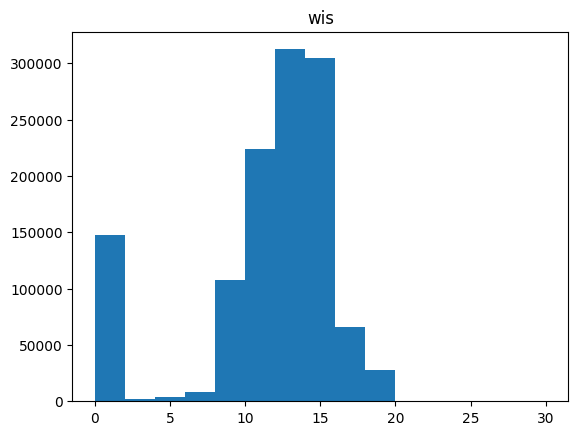

In [140]:
# wisdom

plt.hist(fullSheet['stats_5'], bins=15)
plt.title('wis')
plt.show()

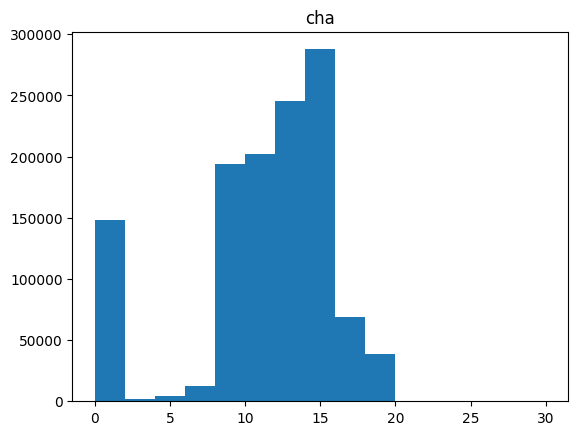

In [141]:
# charisma

plt.hist(fullSheet['stats_6'], bins=15)
plt.title('cha')
plt.show()

In [ ]:
# Str and Cha are definitely dump stats, and yeah that's a shocking amount of 0 values that need to be dealt with. I find it very interesting how consolidated Constitution is, but it makes sense. You can give up a lot of strength if you don't need it, 
    # and also can do so with charisma if you don't care about role playing effectively too much, but you kinda need to not die in combat. Wisdom, likewise, has a similar slant towards average/above average values because it's such a common defensive save
    # vs mind-altering effects and the like. 

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
    # It was very surprising, in a good way, just how complete the dataset was. I did not expect every single character to have a race, class, level, and gold count. That is wonderful to work with.
2. Do you have any concerns about your dataset? 
    # It's going to be a lot of work to separate the classes/feats into their own lists and work through them, and 1.2 million lines is a ton. But it also is such good data that I don't want to trim down the dataset as I originally thought I wanted it. Additionally, the stats that are 0 need to be addressed. 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
    # The vast majority of these were answered during the .head() portion of code in the comments there, but in general I'm going to need to drop multiple irrelevant columns, all of the series with multiple classes/feats separated by a slash are going to need to be broken up into lists, and I'm going to have to see if the nicknames in characters names (that are denoted by single quotes) are going to cause any issues when trying to work with the strings or not. 